In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from helper import *

In [41]:
#####################################
#### helper functions ####
#####################################

def print_df_info(df):
    """
    Prints the shape of the DataFrame and its first few rows.
    """
    print("Data shape:", df.shape)
    print("Data head:")
    print(df.head())
    

def to_numeric(df, col):
    """
    change the col to numeric, replace "Not Available" to none.
    """
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)  
    
            
def summary(df, col):
    """
    run summary analysis on df, if df has boroughs run separate analysis for each borough
    """  
    # Convert col to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')   
    # Check if the Borough column exists in the DataFrame
    if 'Borough' in df.columns:
        # Replace NaN values in Borough column with "Not specified"
        df['Borough'].fillna('Not specified', inplace=True)
        # Group the data by borough and calculate summary statistics
        grouped_data = df.groupby('Borough')[col].agg(['count', 'mean', 'std', 'min','max', 'sum'])
        # Print the summary statistics for the entire dataset
        print(f"Summary statistics for {col}:")
        print(grouped_data)
        
        # Visualize the summary data by borough as a bar chart
        colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
        for stat in ['count', 'mean', 'std', 'min', 'max', 'sum']:
            ax = grouped_data[stat].plot(kind='bar', color=colors)
            ax.set_xlabel('Borough')
            ax.set_ylabel(stat)
            ax.set_title(f"{stat.capitalize()} of {col} by Borough")
            plt.show()
            
    else:
        print(df[col].describe())
               
    
def filter_month(df, month):
    """
    filter out one month in montly ll84 data with column "Month"
    Example for 2020 Nov: Nov-20
    """  
    filter_df = df[(df['Month'] == month)]
    return filter_df


In [4]:
#####################################
#### read and clean yearly data ####
#####################################

### 2020 data
ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv')

# filter - useful columns
cols_to_drop_energy = ll84_all_2020.iloc[:, 89:166].columns.tolist() + ll84_all_2020.columns[[2,3,8,170,171,172,239,240]].tolist() + ll84_all_2020.iloc[:, 187:226].columns.tolist() + ll84_all_2020.iloc[:, 180:216].columns.tolist() + ll84_all_2020.iloc[:, 232:238].columns.tolist()
ll84_yearly_2020 = ll84_all_2020.drop(columns=cols_to_drop_energy)
#ll84_yearly_2020.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84_yearly_2020.csv', index=False)

ll84_yearly_2020 = ll84_yearly_2020.replace('Not Available', None)


### 2019 data
ll84_all_2019 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2019/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv')

# filter - useful columns
cols_to_drop_energy = ll84_all_2019.iloc[:, 89:166].columns.tolist() + ll84_all_2019.columns[[2,3,8,170,171,172,239,240]].tolist() + ll84_all_2019.iloc[:, 187:226].columns.tolist() + ll84_all_2019.iloc[:, 180:216].columns.tolist() + ll84_all_2019.iloc[:, 232:238].columns.tolist()
ll84_yearly_2019 = ll84_all_2019.drop(columns=cols_to_drop_energy)
#ll84_yearly_2019.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84_yearly_2020.csv', index=False)

ll84_yearly_2019 = ll84_yearly_2019.replace('Not Available', None)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/3917716305.py:6: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/3917716305.py:17: DtypeWarning: Columns (10,16,82,225,226) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2019 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2019/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv')


In [5]:
#####################################
#### read and clean PLUTO data ####
#####################################
pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
print_df_info(pluto)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/2317958079.py:1: DtypeWarning: Columns (17,18,20,22,24,25,52) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')


Data shape: (858619, 101)
Data head:
  borough  block  lot  community board  census tract 2010  cb2010  schooldist  \
0      BK   1809   16            303.0              265.0  2001.0        13.0   
1      BK   6183   33            311.0              266.0  3000.0        20.0   
2      BK   6206   22            311.0              268.0  3000.0        20.0   
3      BK   1852   37            303.0              269.0  1001.0        13.0   
4      BK   5893    8            310.0              130.0  2001.0        20.0   

   council district  postcode firecomp  ...  landmkdate  basempdate  masdate  \
0              36.0   11216.0     E235  ...         NaN         NaN      NaN   
1              47.0   11204.0     L168  ...         NaN         NaN      NaN   
2              47.0   11204.0     L168  ...         NaN         NaN      NaN   
3              36.0   11216.0     E235  ...         NaN         NaN      NaN   
4              43.0   11209.0     L109  ...         NaN         NaN      NaN

In [37]:
#####################################
#### Merge PLUTO and yearly data with Lot ####
#####################################

# change BBL to numeric
ll84_yearly_2020['NYC Borough, Block and Lot (BBL)'] = ll84_yearly_2020['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)
ll84_yearly_2019['NYC Borough, Block and Lot (BBL)'] = ll84_yearly_2019['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)

# merge pluto and ll84 data on BBL
yearly_2020_pluto = pd.merge(ll84_yearly_2020, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
yearly_2020_pluto = yearly_2020_pluto.drop(columns=['bbl'])
print_df_info(yearly_2020_pluto)

yearly_2019_pluto = pd.merge(ll84_yearly_2019, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
yearly_2019_pluto = yearly_2019_pluto.drop(columns=['bbl'])
print_df_info(yearly_2019_pluto)

Data shape: (28067, 213)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
2         8604                  114  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
2              114  West  47th  st 

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/2444136238.py:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  yearly_2019_pluto = pd.merge(ll84_yearly_2019, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')


Data shape: (29084, 217)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2019   
1         8139                  200  12/31/2019   
2         8604                  114  12/31/2019   
3         8841                  733  12/31/2019   
4        11809  Conde Nast Building  12/31/2019   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1       City Postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2 

In [7]:
#####################################
#### office buildings data ####
#####################################

office_joined_2020 = yearly_2020_pluto[(yearly_2020_pluto['Primary Property Type - Self Selected'] == 'Office')]
print_df_info(office_joined_2020)

office_joined_2019 = yearly_2019_pluto[(yearly_2019_pluto['Primary Property Type - Self Selected'] == 'Office')]
print_df_info(office_joined_2019)

Data shape: (2347, 213)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   
9      1052478         140 Broadway  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   
9                      1.000480e+09                                  1001027   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
3               733  Third  Avenue  

Summary statistics for Site EUI (kBtu/ft²):
               count       mean         std  min     max       sum
Borough                                                           
BRONX            101  71.295050   42.073570  0.0   245.8    7200.8
BROOKLYN         234  58.208974   48.018206  0.0   411.1   13620.9
MANHATTAN       1628  71.812346  101.343056  0.0  3586.8  116910.5
Not specified     77  74.018182   44.028841  9.2   228.8    5699.4
QUEENS           216  66.288426   49.738677  0.9   492.2   14318.3
STATEN IS         39  69.533333   44.423242  4.6   218.3    2711.8


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/1627443848.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/1627443848.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Borough'].fillna('Not specified', inplace=True)


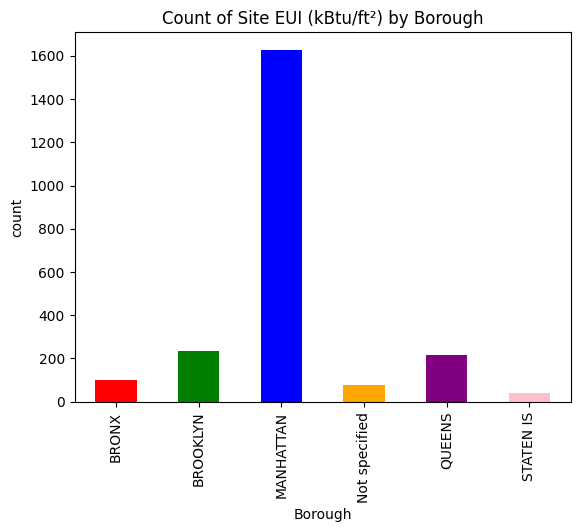

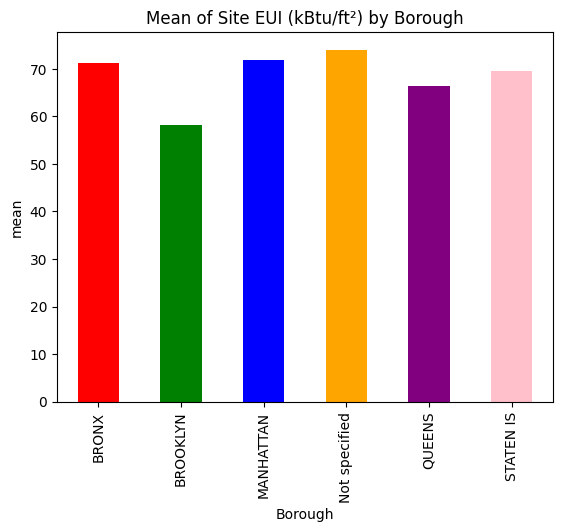

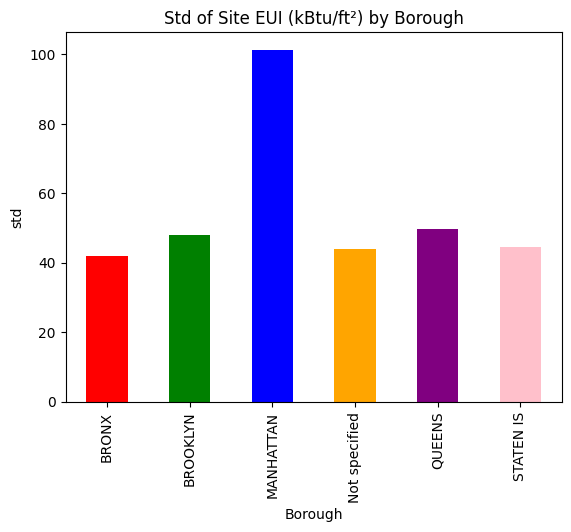

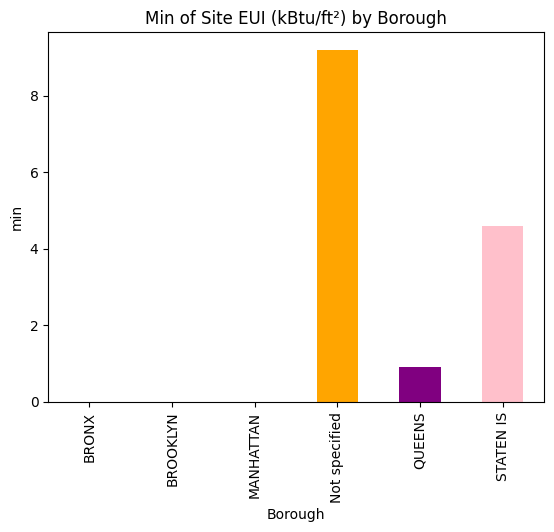

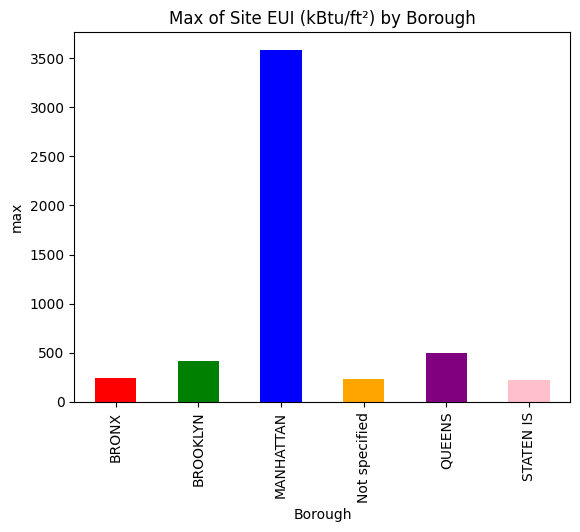

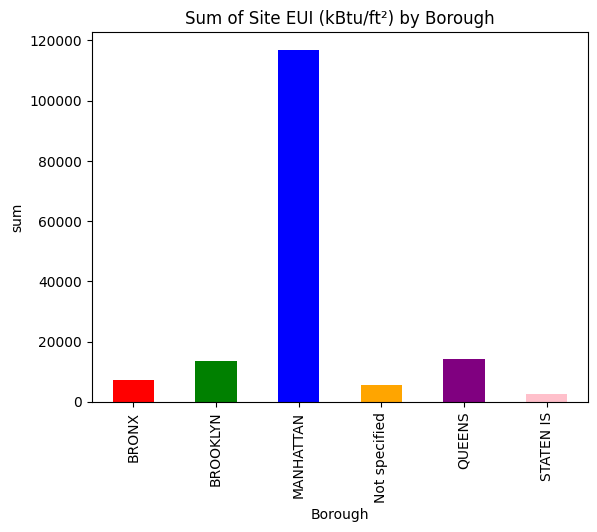

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/1627443848.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/1627443848.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Borough'].fillna('Not specified', inplace=True)


Summary statistics for Site EUI (kBtu/ft²):
               count        mean         std   min     max       sum
Borough                                                             
BRONX            113   82.915929   54.792028   0.0   278.3    9369.5
BROOKLYN         254   70.002756   51.043162   0.0   418.1   17780.7
MANHATTAN       1713   85.160420   51.166520   0.3   938.3  145879.8
Not specified     90  109.641111  191.689726   0.9  1845.2    9867.7
QUEENS           219   76.241553   51.696669   2.1   518.9   16696.9
STATEN IS         37   80.875676   52.227874  10.7   266.0    2992.4


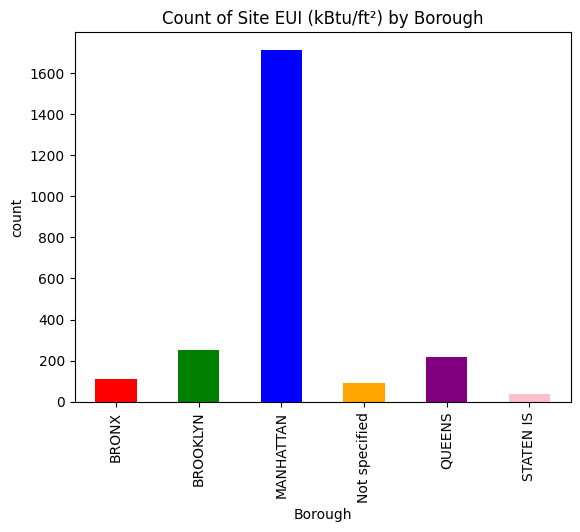

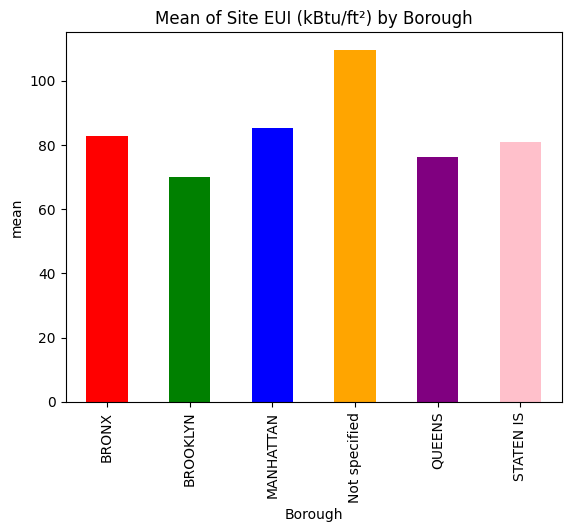

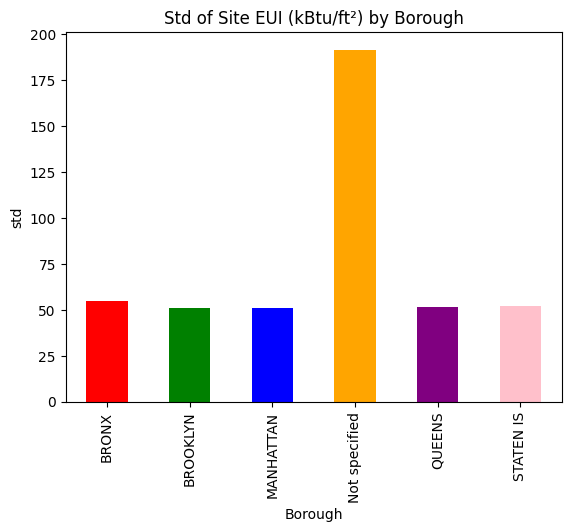

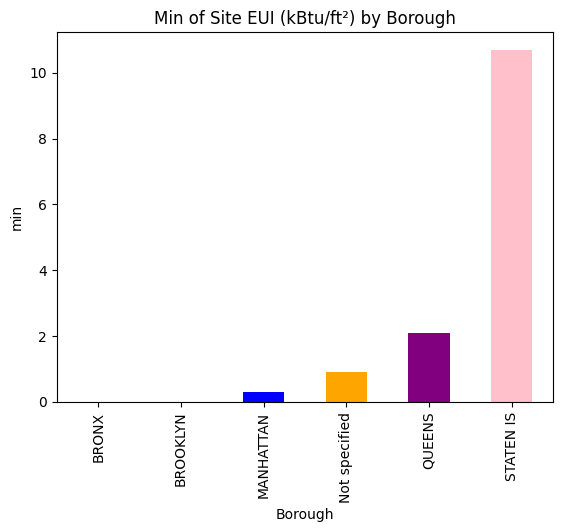

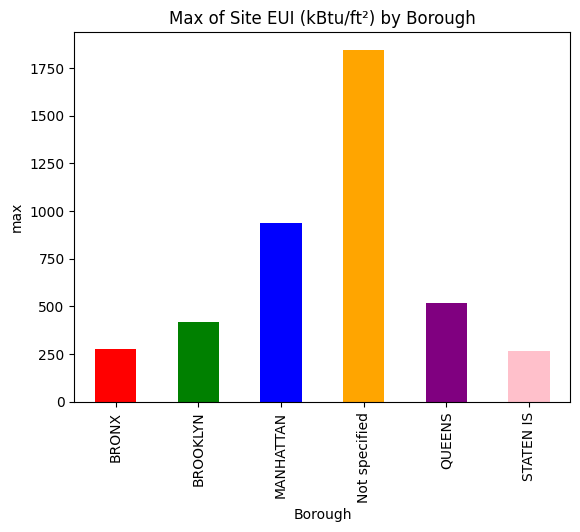

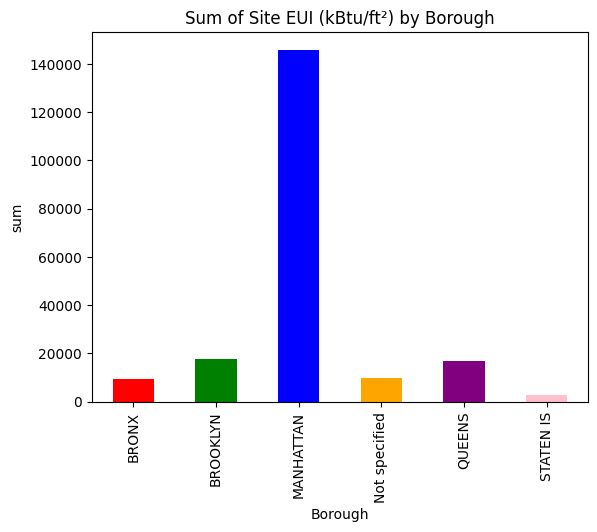

In [28]:
#####################################
#### Summary of office building data 2019 and 2020 ####
#####################################

summary(office_joined_2020, 'Site EUI (kBtu/ft²)')
summary(office_joined_2019, 'Site EUI (kBtu/ft²)')

In [39]:
#####################################
#### read and clean monthly data ####
#####################################

ll84_montly_2020_raw = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Local_Law_84_2021__Monthly_Data_for_Calendar_Year_2020_.csv')
ll84_monthly_2020_raw = ll84_montly_2020_raw.replace('Not Available', pd.NA)
print_df_info(ll84_montly_2020_raw)

ll84_montly_2019_raw = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2019/Local_Law_84_2020__Monthly_Data_for_Calendar_Year_2019_.csv')
ll84_montly_2020 = ll84_montly_2020_raw.replace('Not Available', pd.NA)
print_df_info(ll84_montly_2019_raw)

Data shape: (334044, 7)
Data head:
   Property Id Property Name                   Parent Property Id  \
0         7365          1155  Not Applicable: Standalone Property   
1         7365          1155  Not Applicable: Standalone Property   
2         7365          1155  Not Applicable: Standalone Property   
3         7365          1155  Not Applicable: Standalone Property   
4         7365          1155  Not Applicable: Standalone Property   

                  Parent Property Name   Month Electricity Use  (kBtu)  \
0  Not Applicable: Standalone Property  Jan-20               2175731.1   
1  Not Applicable: Standalone Property  Feb-20               1902208.9   
2  Not Applicable: Standalone Property  Mar-20               1847793.7   
3  Not Applicable: Standalone Property  Apr-20               1613573.0   
4  Not Applicable: Standalone Property  May-20               1747078.0   

  Natural Gas Use  (kBtu)  
0           Not Available  
1           Not Available  
2           Not Avail

In [42]:
#####################################
#### Merge monthly data with building info from yearly data ####
#####################################
# change Property ID to numeric
# ll84_yearly_2020['Property Id'] = ll84_yearly_2020['Property Id'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)
# ll84_yearly_2019['Property Id'] = ll84_yearly_2019['Property Id'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)
to_numeric(ll84_yearly_2020, 'Property Id')
to_numeric(ll84_yearly_2019, 'Property Id')


# merge montly data with yearly on property ID
yearly_2020_pluto = pd.merge(ll84_yearly_2020, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
yearly_2020_pluto = yearly_2020_pluto.drop(columns=['bbl'])
print_df_info(yearly_2020_pluto)

# yearly_2019_pluto = pd.merge(ll84_yearly_2019, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
# yearly_2019_pluto = yearly_2019_pluto.drop(columns=['bbl'])
# print_df_info(yearly_2019_pluto)

Data shape: (28067, 213)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
2         8604                  114  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
2              114  West  47th  st 

In [36]:
#####################################
#### read and clean monthly data ####
#####################################
# Data of 2020-10, 2020-11, 2020-12
Oct_2020 = filter_month(ll84_montly_2020, 'Nov-20')
summary(Oct_2020, 'Electricity Use  (kBtu)')

# Data of 2020-07, 2020-08, 2020-09

# # Data of 2019-10, 2019-11, 2019-12
# discri_analysis(office_joined_2020, 'Month Electricity Use')
# discri_analysis(office_joined_2019, 'Month Electricity Use')

count    2.691600e+04
mean     2.629555e+05
std      1.019559e+06
min     -7.440000e+01
25%      4.560195e+04
50%      8.253650e+04
75%      1.805143e+05
max      6.200022e+07
Name: Electricity Use  (kBtu), dtype: float64


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/2479744419.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
#####################################
#### filter office buildings ####
#####################################

In [ ]:
#####################################
#### Monthly change of 2020 ####
#####################################

In [ ]:
#####################################
#### Compare the same months in 2019 and 2020, calculate the difference ####
#####################################

In [ ]:
#####################################
#### Google's mobility data at the same time ####
#####################################